<a href="https://colab.research.google.com/github/felipeagarcia/StackOverflow-2020-Developer-Survey-Analysis/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [42]:
# configuring plots styles
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

sns.set(
  font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})


In [43]:
# The dataset can be downloaded at https://insights.stackoverflow.com/survey/?_ga=2.69654480.1154988598.1610264075-1259753100.1610264075
df = pd.read_csv('<path-to-your-csv-dataset>') # replace here with your version
                                               # of the dataset
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [44]:
def count_languages(languages_worked_with):
    count = []
    for row in languages_worked_with:
        languages = row.split(';')
        for language in languages:
            count.append(language)
    return pd.Series(count)

In [45]:
count = count_languages(df['LanguageWorkedWith'].dropna())

JavaScript


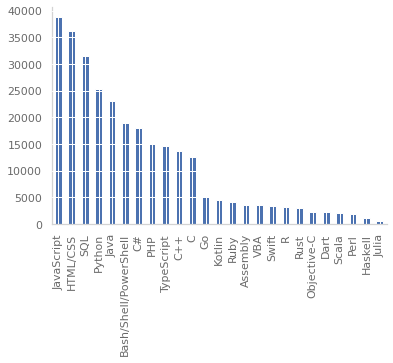

In [46]:
count.value_counts().plot.bar(grid=True);
print(count.value_counts().idxmax())

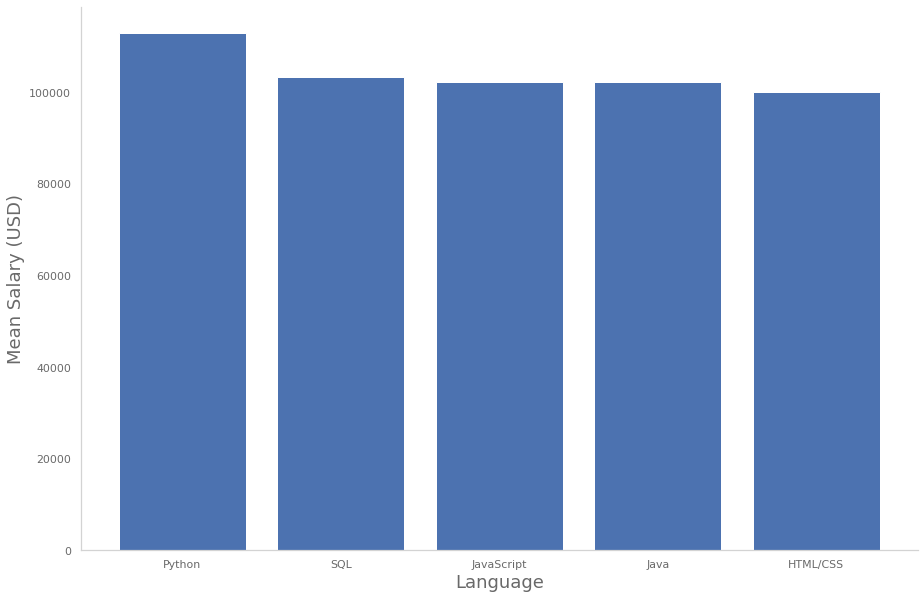

['Python', 'SQL', 'JavaScript', 'Java', 'HTML/CSS']


In [47]:
languages = count.value_counts().iloc[: 5].keys()
salaries_by_lang = {}
aux_df = df.dropna(subset=['LanguageWorkedWith'])
for language in languages:
  salaries_by_lang[language] = aux_df[aux_df['LanguageWorkedWith'].str.contains(language)]['ConvertedComp'].mean()
plt.figure(figsize=(15, 10))
plt.bar(sorted(salaries_by_lang, key=salaries_by_lang.get, reverse=True), sorted(salaries_by_lang.values(), reverse=True))
plt.ylabel('Mean Salary (USD)')
plt.xlabel('Language')
plt.show()
print(sorted(salaries_by_lang, key=salaries_by_lang.get, reverse=True))

In [48]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [49]:
print(df.shape)
df.isna().sum()

(64461, 61)


Respondent                0
MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
                      ...  
WebframeWorkedWith    22182
WelcomeChange         11778
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
Length: 61, dtype: int64

In [50]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

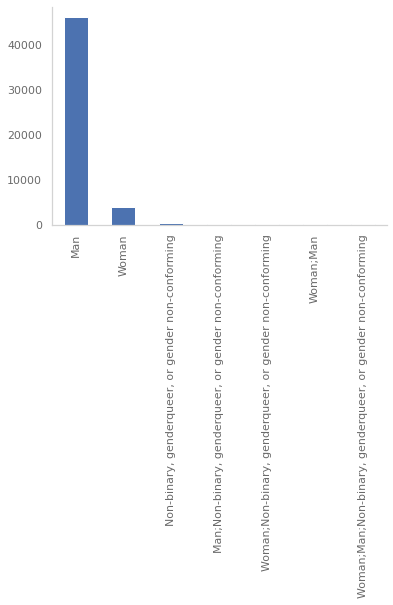

In [51]:
df['Gender'].dropna().value_counts().plot.bar();

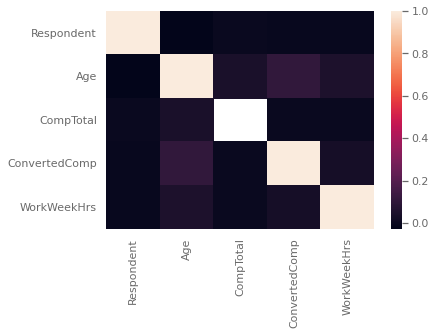

In [52]:
sns.heatmap(df.corr())

In [53]:
print(df[df['Gender'] == 'Man']['ConvertedComp'].mean())
print(df[df['Gender'] == 'Woman']['ConvertedComp'].mean())

103615.91177769474
98300.48065083553


In [54]:
def clean_data(df):
    df = df.dropna(subset=['ConvertedComp'])
    X = df.drop(columns=['ConvertedComp'])
    y = df['ConvertedComp']
    X = df.drop(columns=['CompTotal', 'ConvertedComp'])
    X = pd.concat([X.select_dtypes(include=['object']),
                  X.select_dtypes(exclude=['object']).fillna(X.select_dtypes(exclude=['object']).mean())],
                  axis=1)
    X = pd.concat([X.select_dtypes(include=['object']),
                  X.select_dtypes(exclude=['object']).apply(lambda x: x / max(x), axis=1)],
                  axis=1)
    for col in X.select_dtypes(include=['object']):
        X = pd.concat([X.drop(columns=[col]), pd.get_dummies(X[col], prefix=col, prefix_sep='_', drop_first=True)],
                      axis=1)
    return X, y

In [55]:
X, y = clean_data(df)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
model = SGDRegressor()
epochs = 10
train_size = len(X_train)
for epoch in range(epochs):
  chunk_size = 1/epochs
  init = int(epoch*chunk_size*train_size)
  end = int((epoch+1)*chunk_size*train_size)
  print('epoch', epoch)
  model.partial_fit(X_train[init: end], y_train[init: end])
model.score(X_test, y_test)

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9


0.24782463738731256

In [58]:
coef_dict = {}
for coef, feat in zip(model.coef_, X_train.columns):
    coef_dict[feat] = coef
sorted(coef_dict, key=coef_dict.get, reverse=True)

['CompFreq_Weekly',
 'Country_United States',
 'CurrencyDesc_United States dollar',
 'CurrencySymbol_USD',
 'CurrencyDesc_Pound sterling',
 'CurrencySymbol_GBP',
 'Country_United Kingdom',
 'Respondent',
 'OrgSize_10,000 or more employees',
 'CurrencyDesc_Canadian dollar',
 'CurrencySymbol_CAD',
 'Country_Australia',
 'CurrencyDesc_Australian dollar',
 'CurrencySymbol_AUD',
 'Country_Canada',
 'Country_Ireland',
 'Country_Germany',
 'CurrencyDesc_Swiss franc',
 'CurrencySymbol_CHF',
 'Country_Norway',
 'CurrencyDesc_European Euro',
 'CurrencySymbol_EUR',
 'CurrencyDesc_Norwegian krone',
 'CurrencySymbol_NOK',
 'Country_Switzerland',
 'JobSeek_I am not interested in new job opportunities',
 'EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
 'Age1stCode_7',
 'Country_Spain',
 'YearsCodePro_20',
 'YearsCode_23',
 'CurrencyDesc_New Zealand dollar',
 'CurrencySymbol_NZD',
 'NEWJobHuntResearch_Read company media, such as employee blogs or company culture videos;Company reviews from thi